# Station characterisation
We could try to classify different stations to leisure / work traffic. 

A leisure station would be a station which as compared to the other stations high traffic on weekend days, while having lower traffic on weekdays.

This assumes that on weekends people do not work, which is mostly the case.

The goal is to classify the different station as leisure / utilatarian or mixed.

In [1]:
from data_io.loader.data_loader import DataLoader
import polars as pl
import numpy as np

dl = DataLoader()
station = "Plöck"

Daily mean count $\bar{C}_{24h}$: Sum of daily ```channels_out``` / number of days

In [2]:
from analysis.visualization.characterisation.indices import daily_mean_count

daily_mean_count(loader=dl, station_name=station)

4167.55800775425

How large is the hourly mean count for a station? (f.ex. 0h: 24, 1h: 20, 2h: 18, ...)

Calculating Hourly mean: Sum of counts per hour / 24 hours and normalizing over overall daily mean $\bar{C}_{24h}$ to make stations comparable. 

Therefore:
$$
\begin{align*}
I_{h} = \frac{\bar{C}_{1h}}{\bar{C}_{24h}}
\end{align*}
$$

One would assume we get a general trend that later at night we get low counts, morning mid-day we get high counts. 

In [3]:
from analysis.visualization.characterisation.indices import hourly_index

hourly_index(loader=dl, station_name=station)

hour,mean_C_1h,I_h
i8,f64,f64
0,19.627098,0.004709
1,12.916767,0.003099
2,8.23674,0.001976
3,7.469565,0.001792
4,17.485603,0.004196
…,…,…
19,159.473495,0.038265
20,130.726101,0.031368
21,99.647526,0.02391


How large is the daily mean count for a station? (f.ex. 1st: 246, 2nd: 223, 3rd: 201, ...)

Calculating Daily mean: Sum of counts per day / 24 hours and normalizing over overall daily mean $\bar{C}_{24h}$ to make stations comparable.

Therefore:
$$
\begin{align*}
I_{d} = \frac{\bar{C}_{1d}}{\bar{C}_{24h}}
\end{align*}
$$

In [4]:
from analysis.visualization.characterisation.indices import daily_index

daily_index(loader=dl, station_name=station)

weekday,mean_C_1d,I_d
i8,f64,f64
1,4488.417537,1.07699
2,4886.343096,1.172472
3,4865.460417,1.167461
4,4825.135699,1.157785
5,4372.377358,1.049146
6,3544.770355,0.850563
7,2199.517672,0.527771


How large is the monthly mean count for a station? (f.ex. January: 2463, February: 2231, ...)

Calculating Monthly mean: Sum of counts per month / 30 days and normalizing over overall daily mean $\bar{C}_{24h}$ to make stations comparable. 

Therefore:
$$
\begin{align*}
I_{d} = \frac{\bar{C}_{1d}}{\bar{C}_{24h}}
\end{align*}
$$

In [5]:
from analysis.visualization.characterisation.indices import monthly_index

monthly_index(loader=dl, station_name=station)

month,mean_C_30d,I_m
i8,f64,f64
1,105189.0,25.239961
2,91443.2,21.941674
3,109435.6,26.258927
4,133650.6,32.069284
5,146196.555556,35.079669
…,…,…
8,109482.666667,26.27022
9,122054.0,29.286695
10,122072.9,29.29123


DPI 0.02970483522051482
Diff 0.08028297828196998


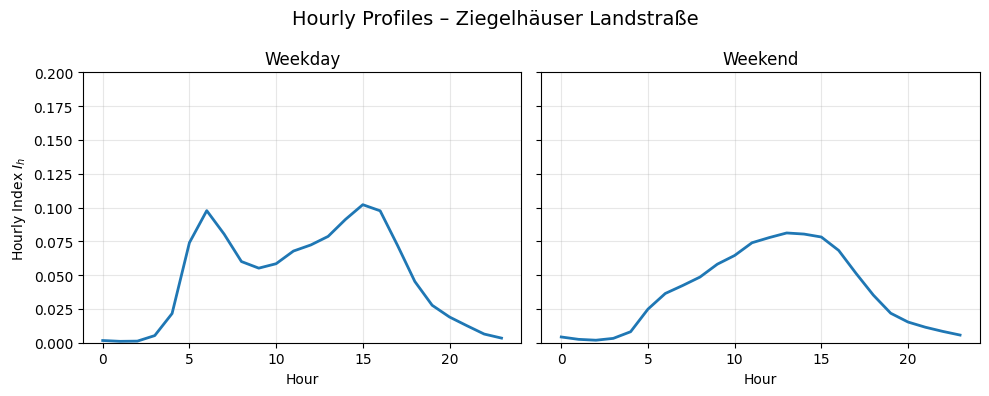

DPI 0.03311982642734115
Diff 0.07802836030933115


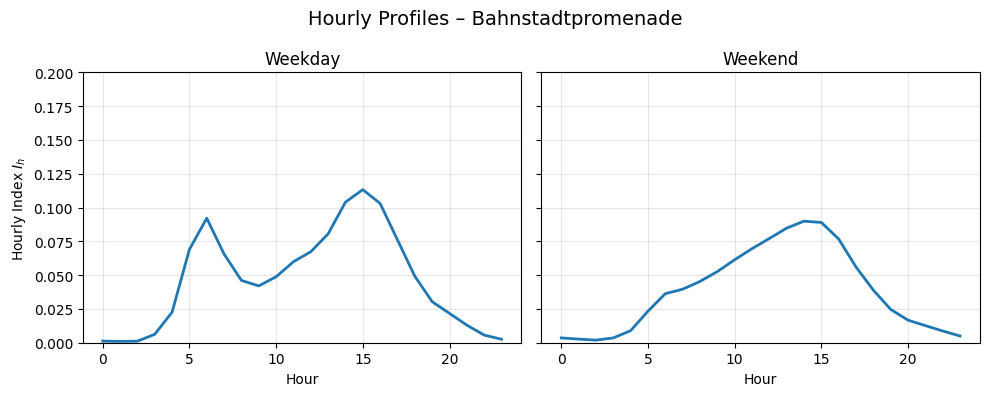

DPI 0.008953088824928611
Diff 0.05720296323267686


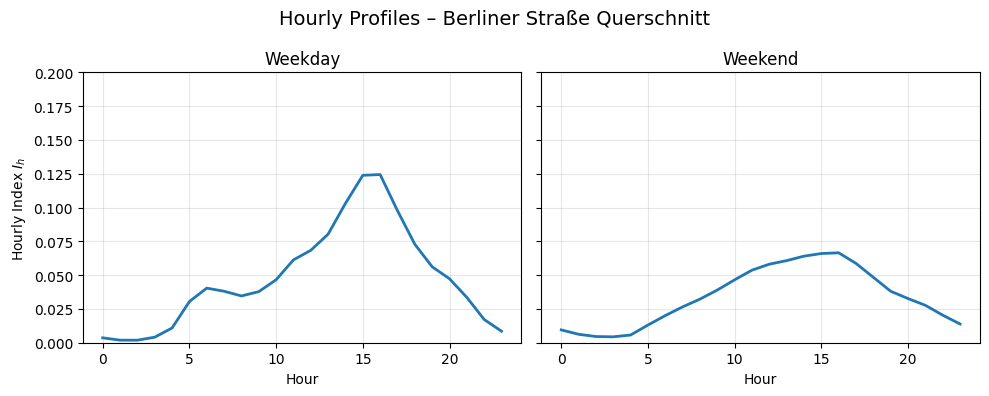

DPI 0.02362735597537766
Diff 0.05806189289071124


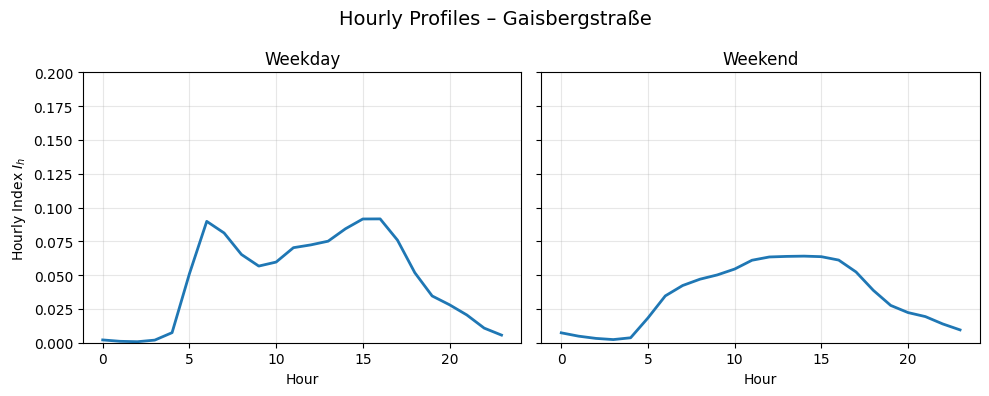

DPI 0.0127229543178115
Diff 0.05375968257451252


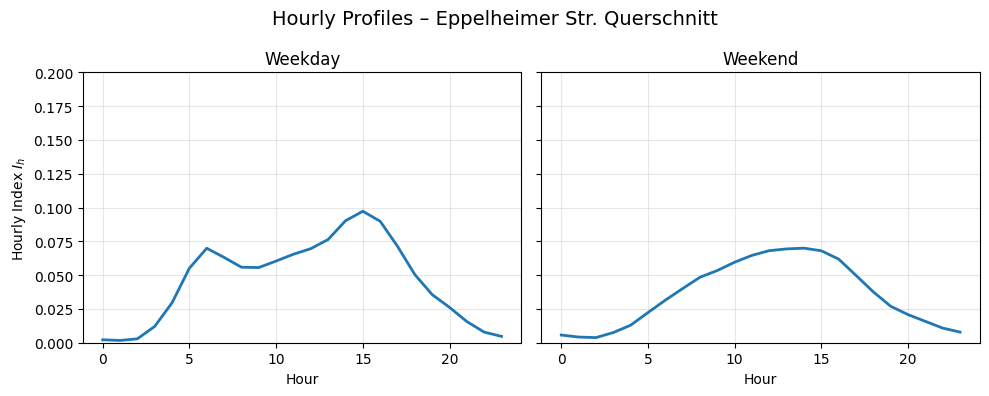

DPI 0.0039398535154902105
Diff 0.03451367844537799


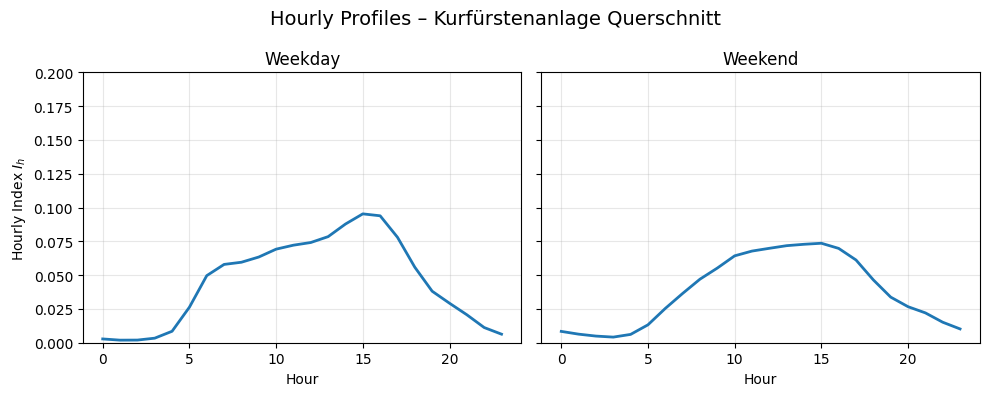

DPI 0.0037781202019900205
Diff 0.03128005066819706


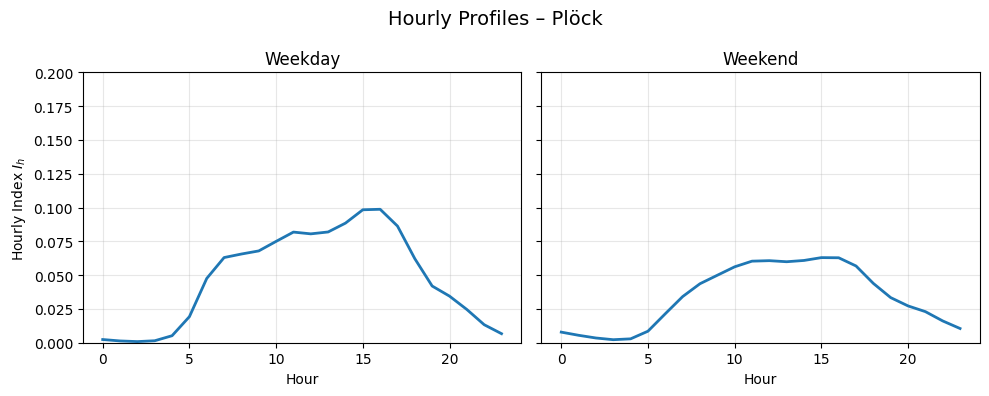

DPI 0.01525037458765514
Diff 0.06651243849270456


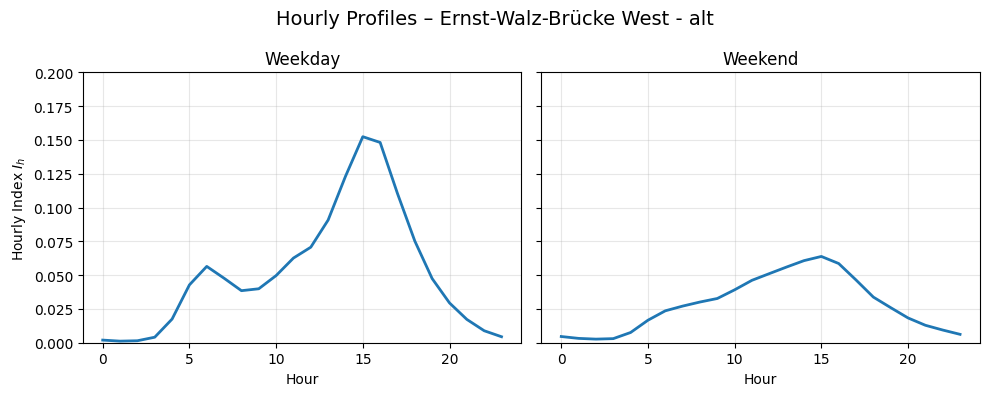

DPI 0.021422203245669295
Diff 0.06051176933529471


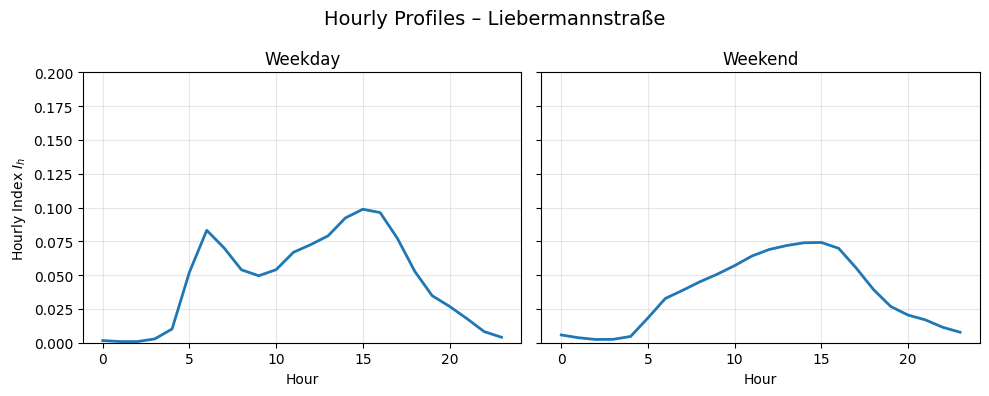

DPI 0.029491451401865317
Diff 0.08531284227744704


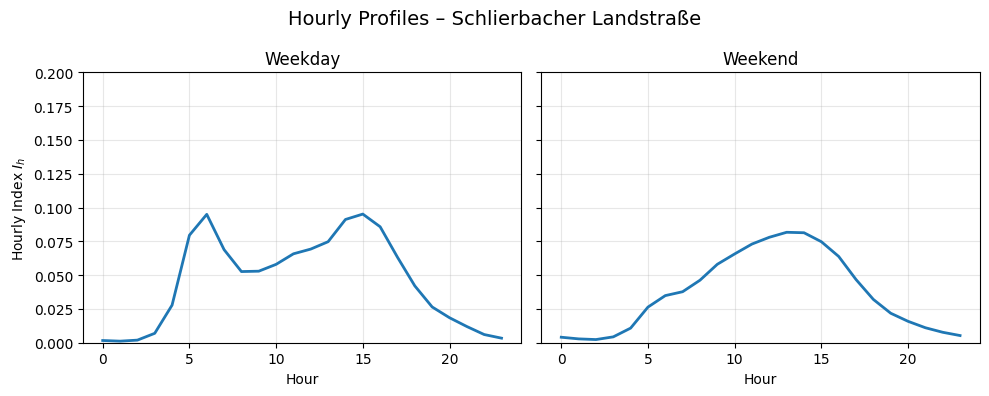

DPI 0.011896288257060014
Diff 0.05016648427257638


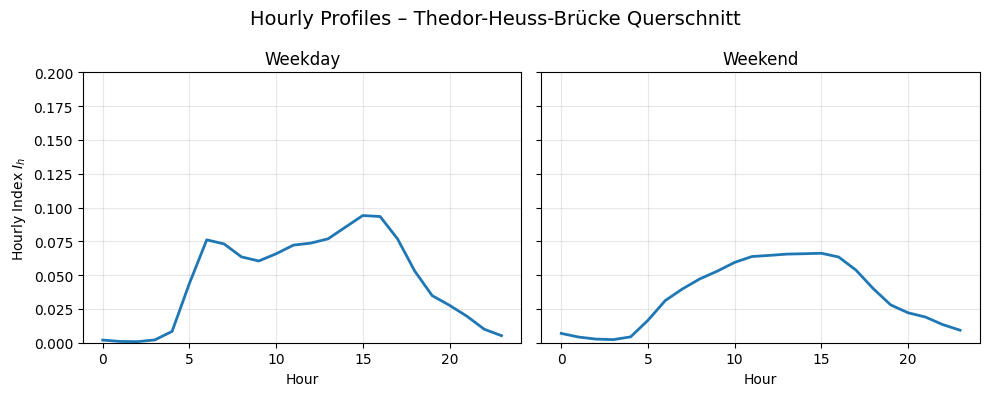

DPI 0.032569828789500814
Diff 0.0767822389262424


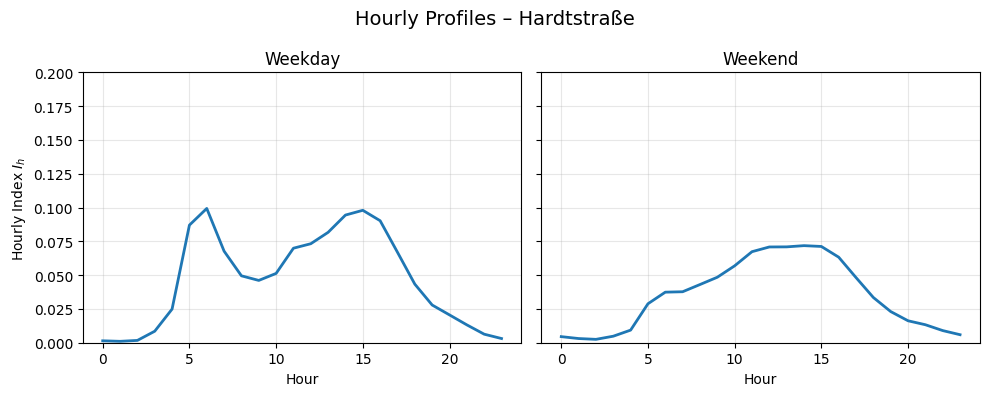

DPI 0.02381604091270358
Diff 0.059758674367229404


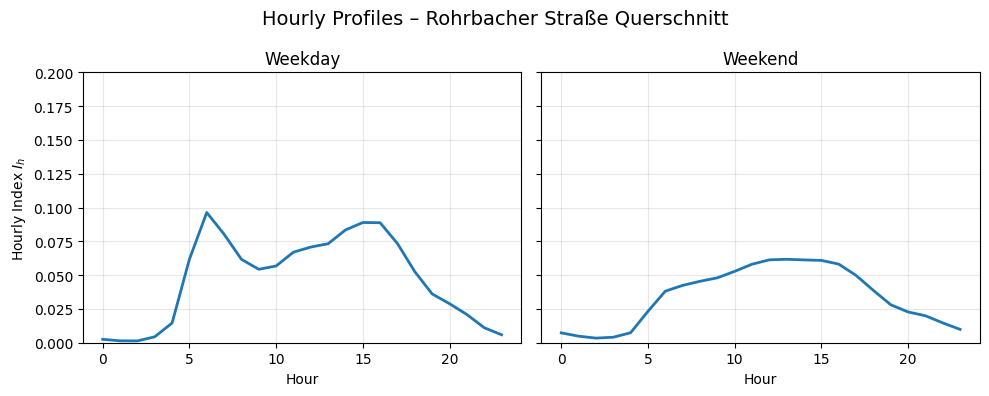

DPI 0.03357903962580346
Diff 0.057858741779439046


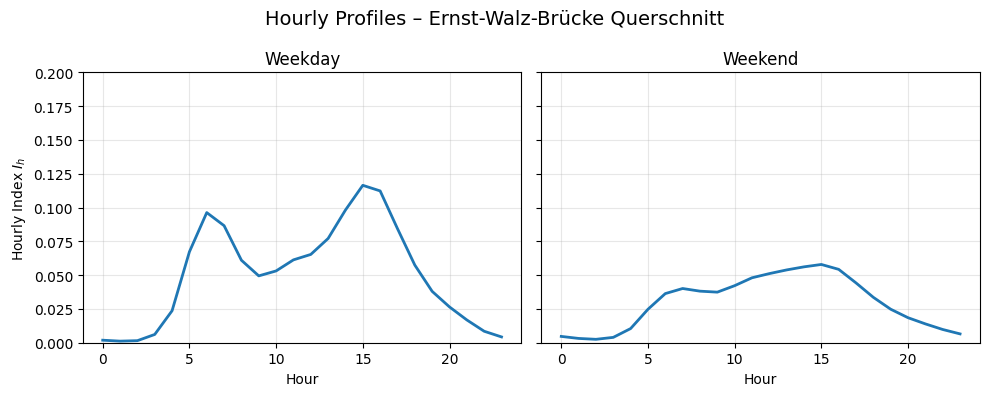

DPI 0.03362876231487876
Diff 0.07286579714888805


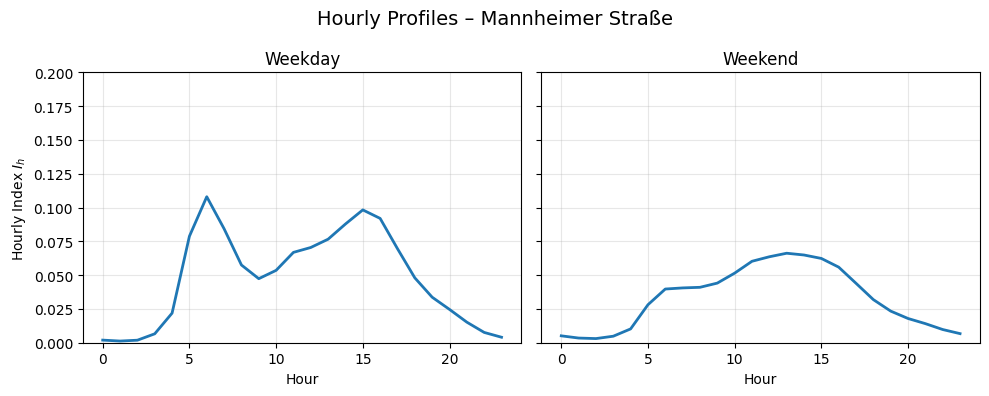

In [6]:
from analysis.visualization.characterisation.plotting import plot_hourly_profiles

for station in dl.get_bicyle_stations():
  plot_hourly_profiles(loader=dl, station_name=station, channel="channels_all", interval=None, ylim=(0, 0.2))

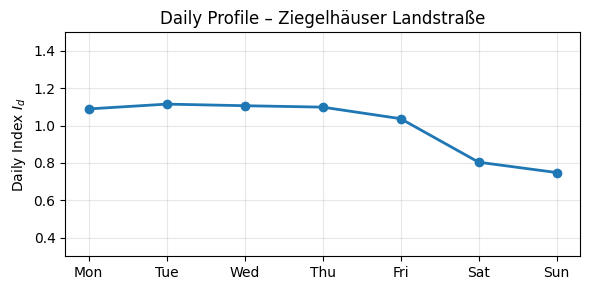

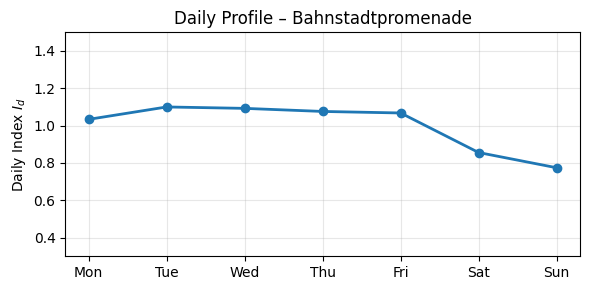

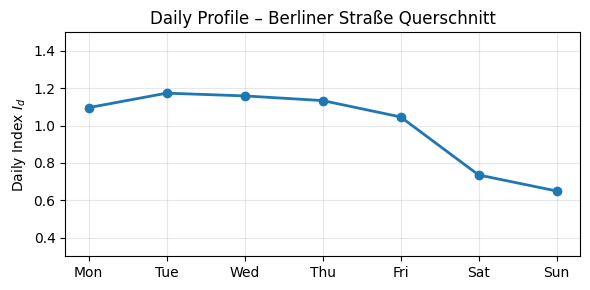

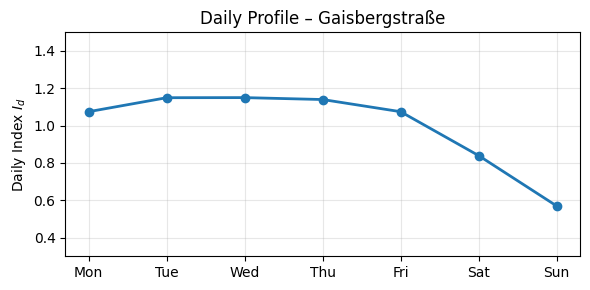

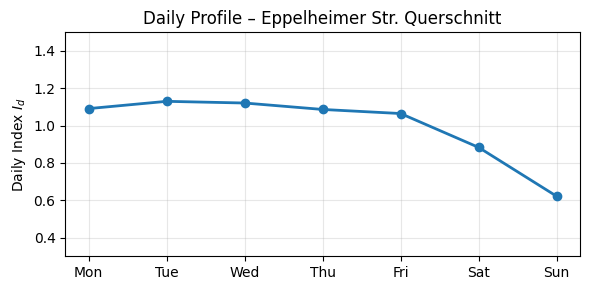

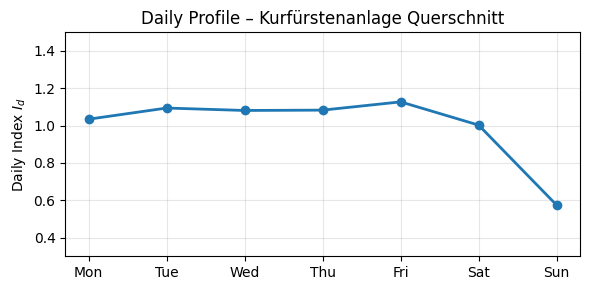

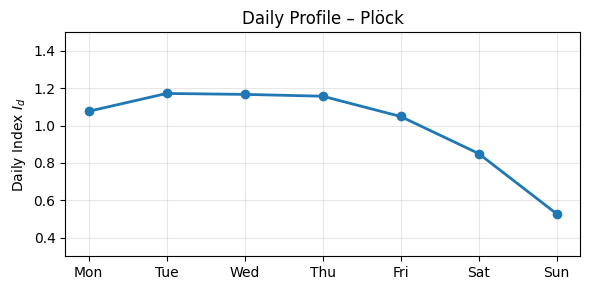

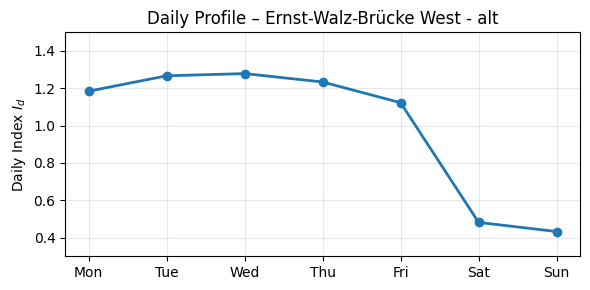

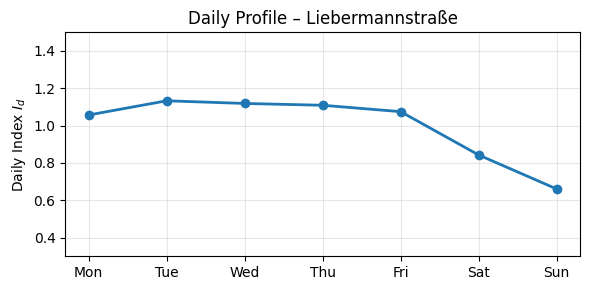

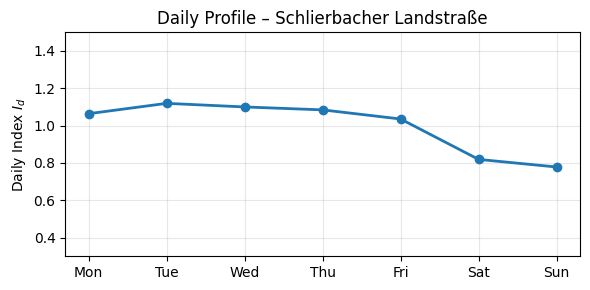

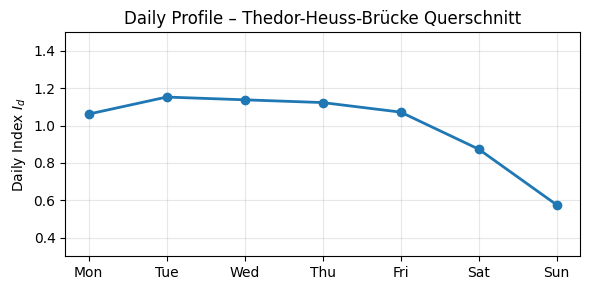

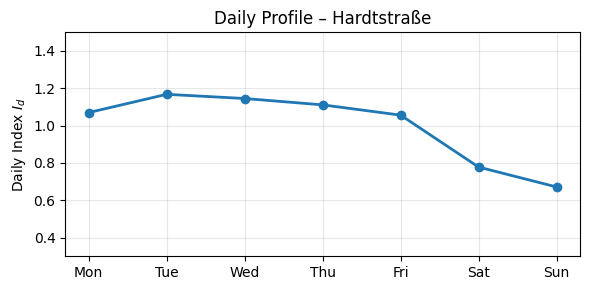

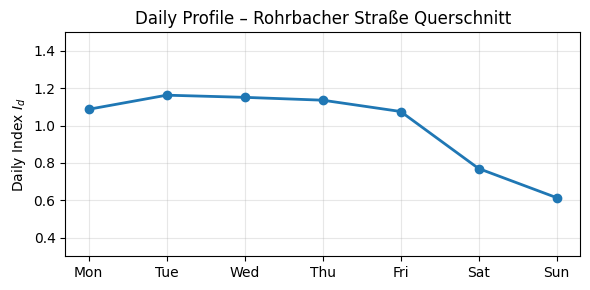

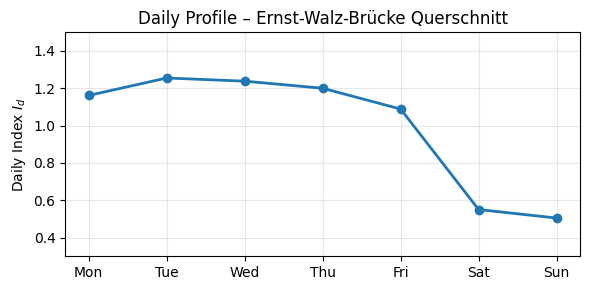

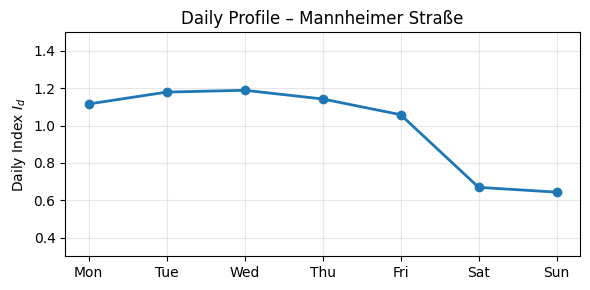

In [7]:
from analysis.visualization.characterisation.plotting import plot_daily_profile

for s in dl.get_bicyle_stations():
    plot_daily_profile(dl, s, ylim=(0.3,1.5))

Warm/Cold Drop: 0.4901287960847255


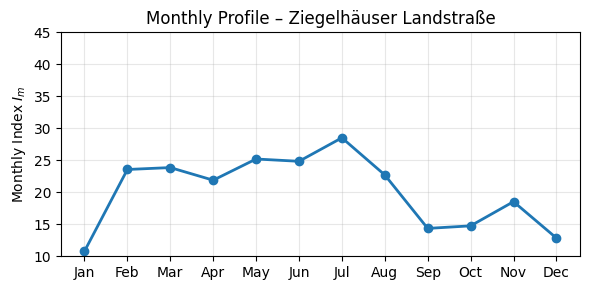

Warm/Cold Drop: 0.5259391112202307


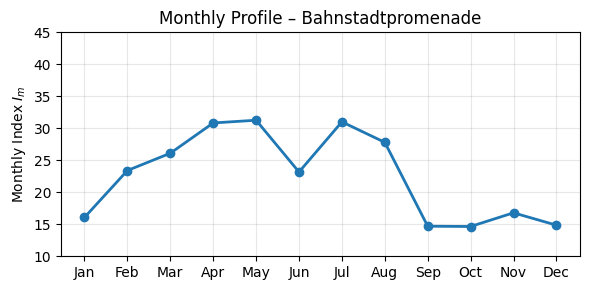

Warm/Cold Drop: 0.3769811699292081


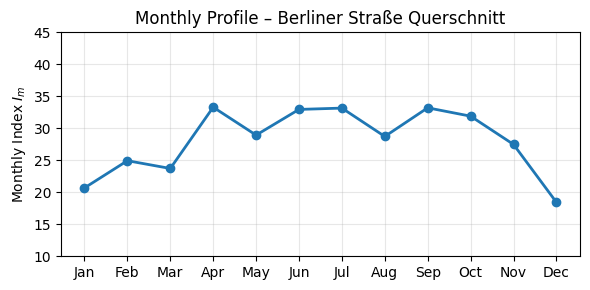

Warm/Cold Drop: 0.26423273376725864


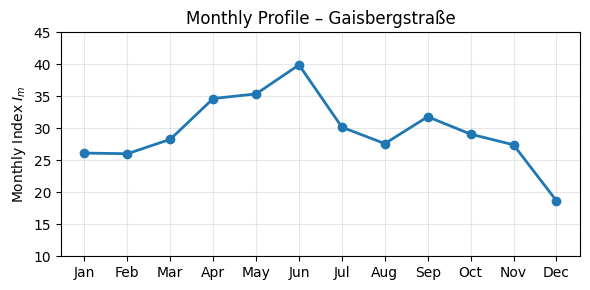

Warm/Cold Drop: 0.4895470763998156


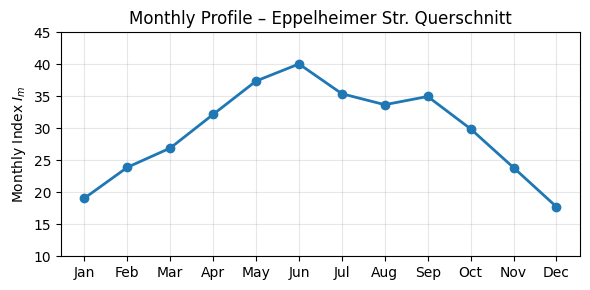

Warm/Cold Drop: 0.4499551203065331


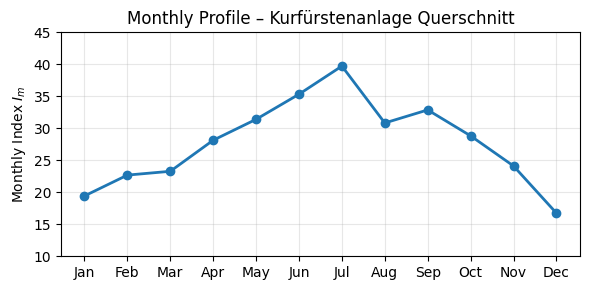

Warm/Cold Drop: 0.3745187795122093


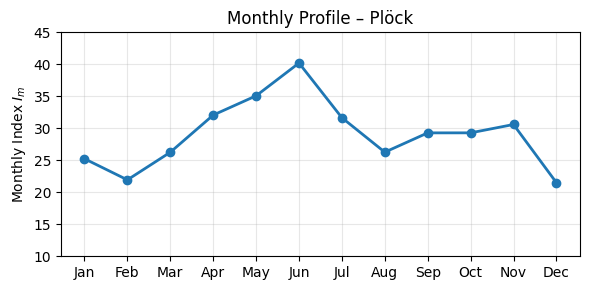

Warm/Cold Drop: 0.3563872251135317


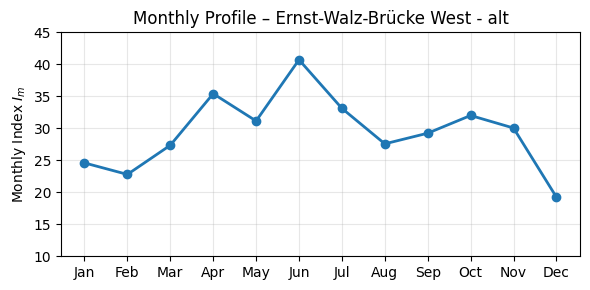

Warm/Cold Drop: 0.45414085979354507


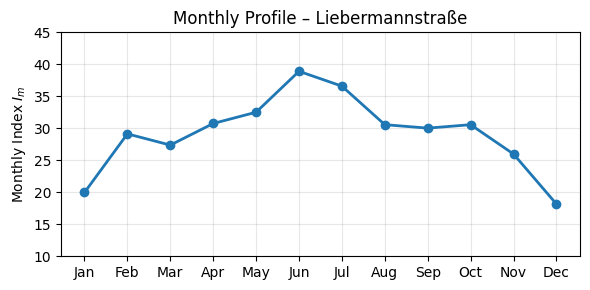

Warm/Cold Drop: 0.6484330303222936


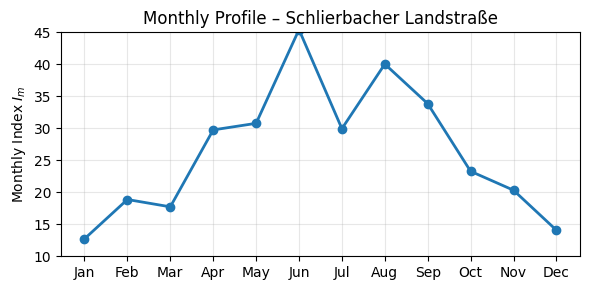

Warm/Cold Drop: 0.2461601641406456


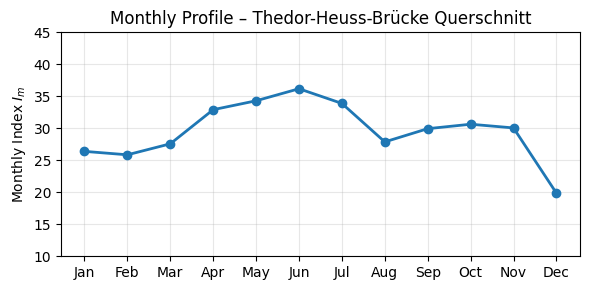

Warm/Cold Drop: 0.5294375258782686


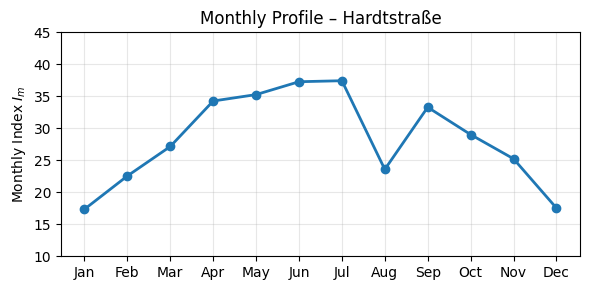

Warm/Cold Drop: 0.24651654447063734


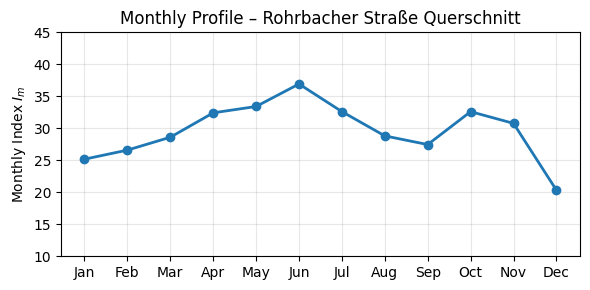

Warm/Cold Drop: 0.23036950311677995


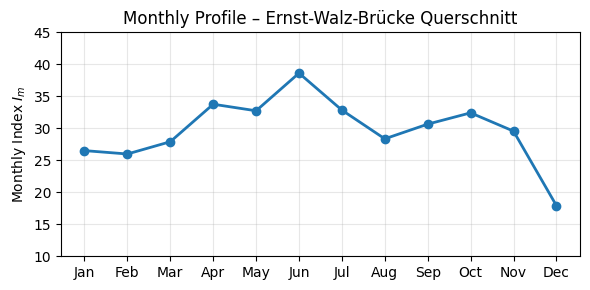

Warm/Cold Drop: 0.40680564749284875


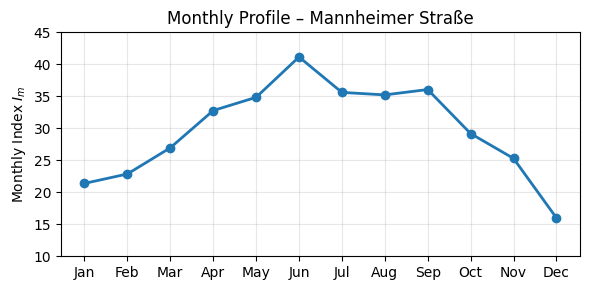

In [8]:
from analysis.visualization.characterisation.plotting import plot_monthly_profile

for s in dl.get_bicyle_stations():
    plot_monthly_profile(dl, s, ylim=(10, 45))

### Clustering using K-Means
Since we want to classify the stations, we will build a feature vector which holds discriminators between leisure and 
utilitarian counting stations.

As discriminators we can choose the following:

In [9]:
from analysis.visualization.characterisation.features import build_feature_df

X = build_feature_df(dl)
X

station,DPI,Drop_season,Shape_diff_wd_we,valid
str,f64,f64,f64,bool
"""Ziegelhäuser Landstraße""",0.029705,0.490129,0.080283,true
"""Bahnstadtpromenade""",0.03312,0.525939,0.078028,true
"""Berliner Straße Querschnitt""",0.008953,0.376981,0.057203,true
"""Gaisbergstraße""",0.023627,0.264233,0.058062,true
"""Eppelheimer Str. Querschnitt""",0.012723,0.489547,0.05376,true
…,…,…,…,…
"""Thedor-Heuss-Brücke Querschnit…",0.011896,0.24616,0.050166,true
"""Hardtstraße""",0.03257,0.529438,0.076782,true
"""Rohrbacher Straße Querschnitt""",0.023816,0.246517,0.059759,true


Find out which K we should choose to maximize Silhouette score (https://de.wikipedia.org/wiki/Silhouettenkoeffizient).

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_valid = X.filter(pl.col("valid") == True)
X_feat = X_valid.drop(["station", "valid"]).to_numpy()
X_scaled = StandardScaler().fit_transform(X_feat)

best_k = 0
best_score = 0
for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=20)
  labels = kmeans.fit_predict(X_scaled)

  score = silhouette_score(X_scaled, labels)
  
  if score > best_score:
    best_k = k
    best_score = max(best_score, score)

  print(f"k={k}: {score:.3f}")

print(f"Best seperation with K = {best_k}")

k=2: 0.444
k=3: 0.410
k=4: 0.481
k=5: 0.450
k=6: 0.413
k=7: 0.397
k=8: 0.384
k=9: 0.388
Best seperation with K = 4


In [11]:
#kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=20)
kmeans = KMeans(n_clusters=3, random_state=0, n_init=20)
labels = kmeans.fit_predict(X_scaled)

X_valid = X_valid.with_columns(pl.Series("cluster_k", labels))

X_k = X.join(
    X_valid.select(["station", "cluster_k"]),
    on="station",
    how="left"
)

X_k.drop(["station", "valid"]).group_by("cluster_k").mean()

cluster_k,DPI,Drop_season,Shape_diff_wd_we
i32,f64,f64,f64
0,0.031703,0.520149,0.078654
2,0.021599,0.299635,0.058812
1,0.007349,0.422751,0.044189


Before we continue let's check the performance of our features to discriminate the data in clusters. 

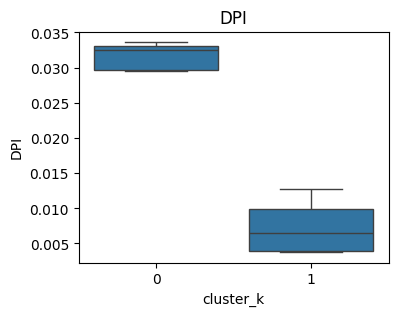

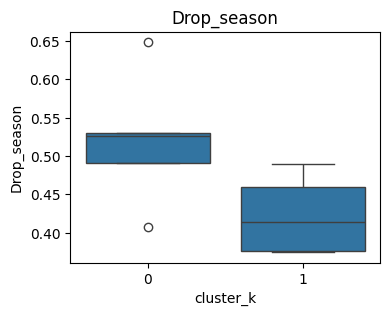

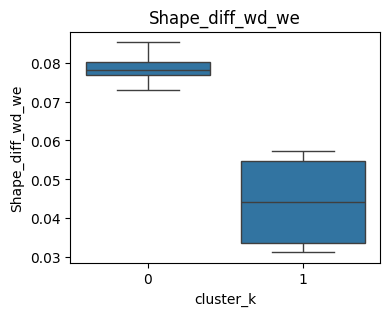

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df = X_k.filter(pl.col("cluster_k").is_in([0, 1]))

for feat in ["DPI", "Drop_season", "Shape_diff_wd_we"]:
    plt.figure(figsize=(4,3))
    sns.boxplot(data=df, x="cluster_k", y=feat)
    plt.title(feat)
    plt.show()

In [14]:
X_valid.select(["DPI", "Drop_season", "Shape_diff_wd_we"]).corr()

DPI,Drop_season,Shape_diff_wd_we
f64,f64,f64
1.0,0.204369,0.829028
0.204369,1.0,0.493598
0.829028,0.493598,1.0


### PCA
Reducing ```X_scaled``` with to two dimensions.

In [15]:
from sklearn.decomposition import PCA


pl.Config.set_tbl_rows(-1)
pl.Config.set_tbl_cols(-1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_)

X_pca_pl = (
    X_k
    .with_columns([
        pl.Series("PC1", X_pca[:, 0]),
        pl.Series("PC2", X_pca[:, 1]),
    ])
)
X_pca_pl

Explained variance: [0.68767703 0.27409158]


station,DPI,Drop_season,Shape_diff_wd_we,valid,cluster_k,PC1,PC2
str,f64,f64,f64,bool,i32,f64,f64
"""Ziegelhäuser Landstraße""",0.029705,0.490129,0.080283,true,0,1.61991,0.080711
"""Bahnstadtpromenade""",0.03312,0.525939,0.078028,true,0,1.844417,0.197778
"""Berliner Straße Querschnitt""",0.008953,0.376981,0.057203,true,1,-0.994396,0.387885
"""Gaisbergstraße""",0.023627,0.264233,0.058062,true,2,-0.521344,-1.117868
"""Eppelheimer Str. Querschnitt""",0.012723,0.489547,0.05376,true,1,-0.526393,1.053647
"""Kurfürstenanlage Querschnitt""",0.00394,0.449955,0.034514,true,1,-2.021878,1.311057
"""Plöck""",0.003778,0.374519,0.03128,true,1,-2.444991,0.794321
"""Ernst-Walz-Brücke West - alt""",0.01525,0.356387,0.066512,true,2,-0.296486,-0.120117
"""Liebermannstraße""",0.021422,0.454141,0.060512,true,2,0.142815,0.344734


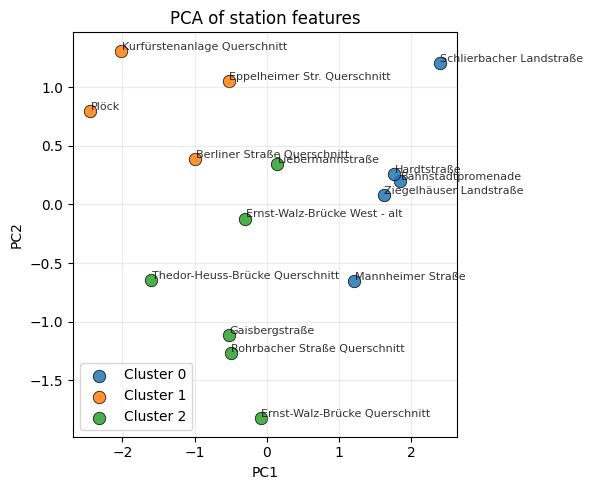

In [16]:
from analysis.visualization.characterisation.plotting import plot_pca_clusters

plot_pca_clusters(
    X_pca_pl,
    cluster_col="cluster_k",
    annotate=True
)

Lets look how this looks on the map

In [17]:
from analysis.visualization.characterisation.map import (bicycle_station_cluster_map, add_cluster_legend)

m_k3 = bicycle_station_cluster_map(dl, X_k, "cluster_k")
add_cluster_legend(m_k3)
m_k3

### Robustness of classes
Currently we calculate the classes for the entire counting station data set. This data set has a date range

In [18]:
mins, maxs = [], []

for station in dl.get_bicyle_stations():
  bd = dl.get_bicycle(station_name=station)
  min_date, max_date = bd.date_range()
  mins.append(min_date)
  maxs.append(max_date)

print(f"Date range of all counting station: {min(mins)} - {max(maxs)}")

Date range of all counting station: 2014-05-31 22:00:00+00:00 - 2025-10-31 21:00:00+00:00


Lets check how robust our clustering is if we restrict the time window. We will define different time windows and check how many stations switched cluster type.

In [19]:
interval_16_17 = ("2016-01-01", "2017-01-01")
interval_15_18 = ("2015-01-01", "2018-01-01")
interval_18_21 = ("2018-01-01", "2021-01-01")
interval_21_24 = ("2021-01-01", "2024-01-01")

feature_15_18 = build_feature_df(loader=dl, interval=interval_15_18)
feature_16_17 = build_feature_df(loader=dl, interval=interval_16_17)
feature_18_21 = build_feature_df(loader=dl, interval=interval_18_21)
feature_21_24 = build_feature_df(loader=dl, interval=interval_21_24)

In [20]:
def cluster_interval(loader, interval=None, k=3):
    X = build_feature_df(loader, interval)
    X_valid = X.filter(pl.col("valid") == True)

    X_feat = X_valid.drop(["station", "valid"]).to_numpy()
    X_scaled = StandardScaler().fit_transform(X_feat)

    labels = KMeans(
        n_clusters=k, random_state=0, n_init=20
    ).fit_predict(X_scaled)

    X_valid = X_valid.with_columns(pl.Series("cluster", labels))

    return X.join(
        X_valid.select(["station", "cluster"]),
        on="station",
        how="left"
    )

In [21]:
C_full   = cluster_interval(dl, interval=None)
C_15_18  = cluster_interval(dl, interval_15_18)
C_16_17  = cluster_interval(dl, interval_16_17)
C_18_21  = cluster_interval(dl, interval_18_21)
C_21_24  = cluster_interval(dl, interval_21_24)

```cluster_ari``` checks for all stations if the cluster in the first clustering is equal to the cluster in the second clustering. 

In [22]:
from sklearn.metrics import adjusted_rand_score

def cluster_ari(df_a, df_b):
    joined = (
        df_a.select(["station", "cluster"])
        .join(df_b.select(["station", "cluster"]), on="station")
        .drop_nulls()
    )
    return adjusted_rand_score(
        joined["cluster"].to_numpy(),
        joined["cluster_right"].to_numpy()
    )


In [23]:
for interval in [C_15_18, C_16_17, C_18_21, C_21_24]:
  score = cluster_ari(C_full, interval)
  print(f"Cluster Consistency Score {score:.3f}")

Cluster Consistency Score 1.000
Cluster Consistency Score 1.000
Cluster Consistency Score 0.588
Cluster Consistency Score 0.647


Cluster changes occure quit quickly with our classification. Instead of hard clustering we could give a probability for a station to be in a certain cluster. We build a cumulative cluster timeseries and calculate
$$
\begin{align*}
P(Cluster\;c\;|\;Station\;s) = \frac{\text{\# Classification Cluster c}}{\text{Total number of classifications}}
\end{align*}
$$

In [24]:
from analysis.visualization.characterisation.clustering import cumulative_cluster_timeseries_aligned

C_cum_aligned = cumulative_cluster_timeseries_aligned(
    dl, k=3, start="2016-01-01", end="2024-01-01"
)
C_cum_aligned


cluster_probs = (
    C_cum_aligned
    .group_by(["station", "cluster"])
    .agg(pl.len().alias("n"))
    .with_columns(
        (pl.col("n") / pl.col("n").sum().over("station"))
        .alias("probability")
    )
    .sort(["station", "cluster"])
)

cluster_probs

station,cluster,n,probability
str,i32,u32,f64
"""Bahnstadtpromenade""",0,37,0.860465
"""Bahnstadtpromenade""",1,6,0.139535
"""Berliner Straße Querschnitt""",2,43,1.0
"""Eppelheimer Str. Querschnitt""",2,43,1.0
"""Ernst-Walz-Brücke Querschnitt""",0,11,0.120879
"""Ernst-Walz-Brücke Querschnitt""",1,80,0.879121
"""Ernst-Walz-Brücke West - alt""",0,11,0.120879
"""Ernst-Walz-Brücke West - alt""",1,80,0.879121
"""Gaisbergstraße""",0,12,0.131868


The clusters seem to be only moderately consistent.

For future analysis we want to extract the stations with the highest prob. as representative for the cluster.

In [27]:
top_per_cluster = (
    cluster_probs
    .sort("probability", descending=True)
    .group_by("cluster")
    .head(5)  
)

top_per_cluster

cluster,station,n,probability
i32,str,u32,f64
0,"""Schlierbacher Landstraße""",55,1.0
0,"""Ziegelhäuser Landstraße""",55,1.0
0,"""Bahnstadtpromenade""",37,0.860465
0,"""Hardtstraße""",35,0.813953
0,"""Mannheimer Straße""",46,0.505495
1,"""Liebermannstraße""",50,0.909091
1,"""Rohrbacher Straße Querschnitt""",50,0.909091
1,"""Ernst-Walz-Brücke Querschnitt""",80,0.879121
1,"""Ernst-Walz-Brücke West - alt""",80,0.879121


## Cluster Interpretation
Resulting from k-Means clustering we get the following clusters for the entire time series.

In [26]:
pl.Config.set_tbl_rows(-1)
pl.Config.set_tbl_cols(-1)

X_k

station,DPI,Drop_season,Shape_diff_wd_we,valid,cluster_k
str,f64,f64,f64,bool,i32
"""Ziegelhäuser Landstraße""",0.029705,0.490129,0.080283,true,0
"""Bahnstadtpromenade""",0.03312,0.525939,0.078028,true,0
"""Berliner Straße Querschnitt""",0.008953,0.376981,0.057203,true,1
"""Gaisbergstraße""",0.023627,0.264233,0.058062,true,2
"""Eppelheimer Str. Querschnitt""",0.012723,0.489547,0.05376,true,1
"""Kurfürstenanlage Querschnitt""",0.00394,0.449955,0.034514,true,1
"""Plöck""",0.003778,0.374519,0.03128,true,1
"""Ernst-Walz-Brücke West - alt""",0.01525,0.356387,0.066512,true,2
"""Liebermannstraße""",0.021422,0.454141,0.060512,true,2


### Cluster Characteristics

- **Leisure-oriented**
  - Low to moderate DPI (0.02–0.03): Weak or only slightly pronounced commute peaks
  - Strong seasonal drop (0.45–0.65): Usage highly weather- and season-dependent
  - Indicates recreational, leisure, or mixed urban usage

- **Utilitarian / commuter**
  - Moderate DPI (0.02–0.03): Consistent morning/evening commute structure
  - Weak seasonal drop (≈ 0.23–0.27): stable year-round usage
  - Represents daily commuter traffic

- **Low-profile / inner-city work traffic**
  - Very low DPI (< 0.015): No clear double-peak structure
  - Moderate seasonal drop (≈ 0.35–0.49)
  - Typical for dense inner-city areas with flattened daily profiles

### Used Features

**Double Peak in daily profile (DPI: Double Peak Index)**

Utilitarian bicycle traffic typically exhibits two pronounced peaks corresponding to the start and end of the working day.
The Double Peak Index quantifies the strength and separation of these morning and evening peaks relative to the midday baseline.

Leisure-oriented stations are expected to show a weaker or absent double-peak structure.

**Season Drop**

The Seasonal Drop compares bicycle traffic during warm months (spring/summer) with cold months (winter).

Utilitarian stations are assumed to be less season-dependent, while leisure-oriented stations are expected to show a stronger seasonal decline due to weather sensitivity.

**Excluded Feature: Weekend Drop**

Although theoretically plausible, the Weekend Drop showed substantial overlap between clusters and limited discriminative power in the observed urban bicycle traffic data.
This suggests that weekend usage patterns in the study area are strongly mixed and do not reliably separate leisure and utilitarian behavior.
Therefore, this feature was deliberately excluded from the final clustering.